In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

import yfinance as yf
print(yf.__version__)

0.2.3


In [4]:
help(yf)

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # yfinance - market data downloader
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    data
    exceptions
    multi
    scrapers (package)
    shared
    ticker
    tickers
    utils
    version

CLASSES
    builtins.object
        yf

In [7]:
df = yf.download("^NSEI", interval="1mo", period="max")
df = df[:-1]
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,17243.199219,17992.199219,17154.800781,17759.300781,17759.300781,5589500
2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300
2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900
2022-11-01,18130.699219,18816.050781,17959.199219,18758.349609,18758.349609,5257200
2022-12-01,18871.949219,18887.599609,17774.250000,18105.300781,18105.300781,4741600


In [15]:
df.shape

(183, 7)

In [9]:
df["returns"] = df["Close"].pct_change()
df.head()

/tmp/ipykernel_4514/2188044958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["returns"] = df["Close"].pct_change()


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2007-10-01,5021.500000,5976.000000,5000.950195,5900.649902,5900.649902,0,NaN
2007-11-01,5903.799805,6011.950195,5394.350098,5762.750000,5762.750000,0,-0.023370
2007-12-01,5765.450195,6185.399902,5676.700195,6138.600098,6138.600098,0,0.065221
2008-01-01,6136.750000,6357.100098,4448.500000,5137.450195,5137.450195,0,-0.163091
2008-02-01,5140.600098,5545.200195,4803.600098,5223.500000,5223.500000,0,0.016750


In [11]:
positive_rets = df[df["returns"] >= 0]
positive_rets.tail()

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2022-03-01,16593.099609,17559.800781,15671.450195,17464.750000,17464.750000,7959500,0.039946
2022-07-01,15703.700195,17172.800781,15511.049805,17158.250000,17158.250000,5475300,0.087324
2022-08-01,17243.199219,17992.199219,17154.800781,17759.300781,17759.300781,5589500,0.035030
2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900,0.053693
2022-11-01,18130.699219,18816.050781,17959.199219,18758.349609,18758.349609,5257200,0.041425


In [12]:
positive_rets.shape

(101, 7)

In [13]:
negative_rets = df[df["returns"] < 0]
negative_rets.tail()


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2022-04-01,17436.900391,18114.650391,16824.699219,17102.550781,17102.550781,5658100,-0.020739
2022-05-01,16924.449219,17132.849609,15735.750000,16584.550781,16584.550781,6343200,-0.030288
2022-06-01,16594.400391,16793.849609,15183.400391,15780.250000,15780.250000,5514100,-0.048497
2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300,-0.037442
2022-12-01,18871.949219,18887.599609,17774.250000,18105.300781,18105.300781,4741600,-0.034814


In [14]:
negative_rets.shape

(81, 7)

In [17]:
positive_rets["returns"].describe()

count    101.000000
mean       0.047893
std        0.041090
min        0.001314
25%        0.015643
50%        0.039946
75%        0.068128
max        0.280660
Name: returns, dtype: float64

<AxesSubplot:xlabel='returns', ylabel='Count'>

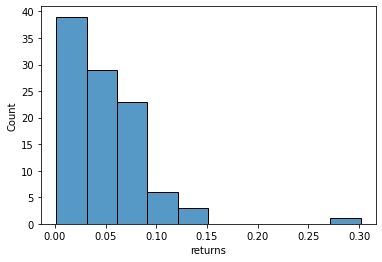

In [29]:
sns.histplot(data=positive_rets["returns"], binwidth=0.03, stat="count")

In [ ]:
# pr_list = sorted(list(map(lambda x: round(x*100, 2), list(positive_rets["returns"]))))
# pr_list

In [25]:
negative_rets["returns"].describe()

count    81.000000
mean     -0.041416
std       0.046659
min      -0.264103
25%      -0.048501
50%      -0.031357
75%      -0.012290
max      -0.000298
Name: returns, dtype: float64

<AxesSubplot:xlabel='returns', ylabel='Count'>

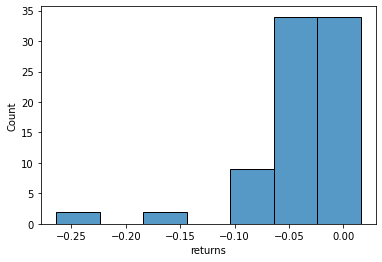

In [26]:
sns.histplot(data=negative_rets["returns"], binwidth=0.04, stat="count")